# DATA CLEANUP

In [99]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [100]:
data = pd.read_csv('../../../Csv/Pune_House_Data.csv')
data.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [101]:
data.shape

(13320, 9)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# NULLVALUE HEATMAP

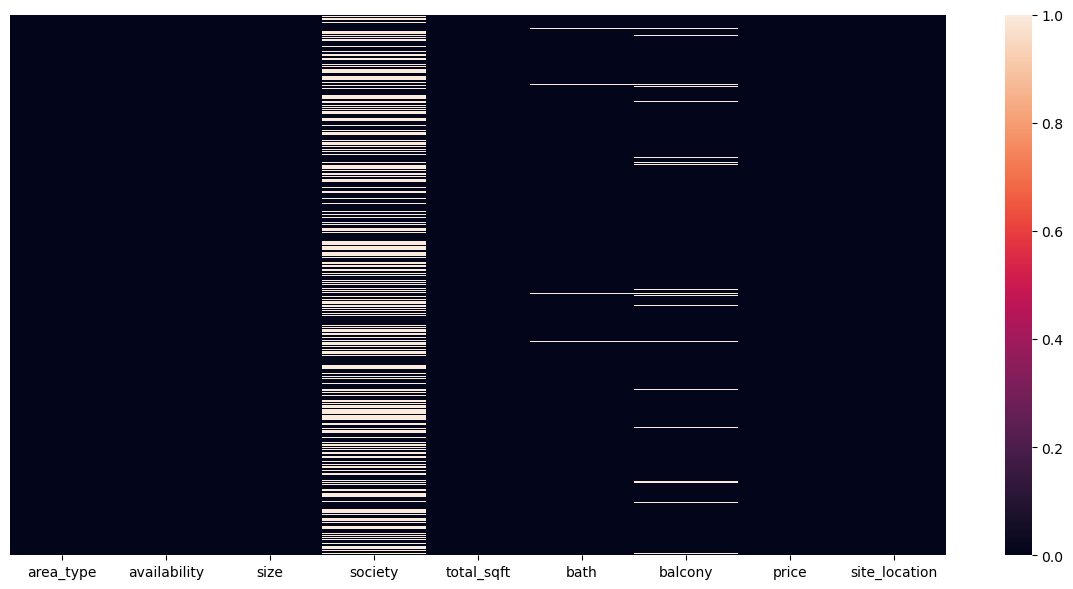

In [103]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isna(),yticklabels=False)
plt.tight_layout()

In [104]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
4

In [105]:
data.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [106]:
data.drop(columns= ["society","area_type","availability","balcony"],inplace=True)

In [107]:
data.head()

,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


In [108]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           13304 non-null  object 
 1   total_sqft     13320 non-null  object 
 2   bath           13247 non-null  float64
 3   price          13320 non-null  float64
 4   site_location  13319 non-null  object 
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [110]:
data["site_location"].value_counts()

Alandi Road            139
Kalyani Nagar          139
Mahatma Gandhi Road    139
Lulla Nagar            139
Laxmi Road             139
                      ... 
Sadashiv Peth          138
Raviwar Peth           138
Rasta Peth             138
Ghorpadi               138
other                    1
Name: site_location, Length: 97, dtype: int64

In [111]:
data["site_location"] = data["site_location"].fillna('Mukund Nagar')

In [112]:
data["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [113]:
data["size"] = data["size"].fillna('2 BHK')

In [114]:
data["bath"].median()

2.0

In [115]:
data["bath"] = data["bath"].fillna(data["bath"].median())

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   size           13320 non-null  object 
 1   total_sqft     13320 non-null  object 
 2   bath           13320 non-null  float64
 3   price          13320 non-null  float64
 4   site_location  13320 non-null  object 
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [117]:
data["bhk"] = data["size"].str.split().str.get(0).astype(int)

In [118]:
data.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [119]:
data.rename(columns={'site_location':'location'},inplace=True)

In [120]:
data.head()

,size,total_sqft,bath,price,location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [121]:
data[data["bhk"]>20]

,size,total_sqft,bath,price,location,bhk
1718,27 BHK,8000,27.0,230.0,Uruli Devachi,27
4684,43 Bedroom,2400,40.0,660.0,Salunke Vihar,43


In [122]:
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [123]:
def convertRange(y):
    x = str(y)
    temp = x.split('-')
    if(len(temp) >1 ):
        mean_Value = (float(temp[0]) + float(temp[1]))/2
#         print(temp,"-----",mean_Value)
        return mean_Value
    else:
        return float(x)
#         print(temp)
# convertRange('115-120-30')

In [124]:
# data["total_sqft"][data["total_sqft"].str.contains('s')]

In [125]:
def seprateQuantity(x):
    temp = [char for char in x]
    print(temp)
    area = []
    acceptedValues = ['1', '2', '3', '4','5', '6', '7', '8','9', '0', '.']
    for value in temp:
        if value in acceptedValues:
            area.append(value)
#     print("".join(area))
    if(str(area[-1]) == '.'):
        area = area[0:-1]
#         print(area)
    final_area = "".join(area)
    return float(final_area)
    
# seprateQuantity('123.4hello.')

In [126]:
data

,size,total_sqft,bath,price,location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2
...,...,...,...,...,...,...
13315,5 Bedroom,3453,4.0,231.00,Pashan,5
13316,4 BHK,3600,5.0,400.00,Paud Road,4
13317,2 BHK,1141,2.0,60.00,Pirangut,2
13318,4 BHK,4689,4.0,488.00,Prabhat Road,4


In [127]:
#removing alphabets from the sqft column 

#applying this on 'a','r' and 's'
temp_df = data[data["total_sqft"].str.contains('s') ==True]

#applying function and storing in another column name tt
temp_df['tt'] = temp_df["total_sqft"].apply(seprateQuantity)

# storing all the values in main dataframe
for i in temp_df.index:
    data.loc[i,'total_sqft'] = temp_df.loc[i,'tt']

['5', '.', '3', '1', 'A', 'c', 'r', 'e', 's']
['3', '0', 'A', 'c', 'r', 'e', 's']
['3', 'C', 'e', 'n', 't', 's']
['2', '.', '0', '9', 'A', 'c', 'r', 'e', 's']
['1', '5', '0', '0', 'C', 'e', 'n', 't', 's']
['2', 'A', 'c', 'r', 'e', 's']
['1', '5', 'A', 'c', 'r', 'e', 's']
['1', '.', '2', '6', 'A', 'c', 'r', 'e', 's']
['1', 'G', 'r', 'o', 'u', 'n', 'd', 's']
['1', '.', '2', '5', 'A', 'c', 'r', 'e', 's']
['6', 'A', 'c', 'r', 'e', 's']


C:\Users\bindu\AppData\Local\Temp\ipykernel_19100\1123421034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['tt'] = temp_df["total_sqft"].apply(seprateQuantity)


In [128]:
data[data["total_sqft"].str.contains('S') ==True]

,size,total_sqft,bath,price,location,bhk


In [129]:
data["total_sqft"] = data["total_sqft"].apply(convertRange)

In [130]:
data.describe() # some values are less than 200

,total_sqft,bath,price,bhk
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,1555.971707,2.688814,112.565627,2.802778
std,1238.902448,1.338754,148.971674,1.294496
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,72.000000,3.000000
75%,1679.250000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


In [131]:
data[data["total_sqft"] <100]

,size,total_sqft,bath,price,location,bhk
349,3 Bedroom,11.00,3.0,74.00,Narayan Peth,3
410,1 BHK,34.46,1.0,18.50,Ganeshkhind,1
1019,1 Bedroom,5.31,1.0,110.00,Nagar Road,1
1020,1 BHK,15.00,1.0,30.00,Nana Peth,1
1086,2 Bedroom,30.00,2.0,29.50,Gultekdi,2
1122,5 Bedroom,24.00,2.0,150.00,Pashan,5
4086,4 Bedroom,1.00,4.0,120.00,Mangalwar peth,4
4972,7 BHK,5.00,7.0,115.00,Salunke Vihar,7
5453,6 Bedroom,3.00,6.0,75.00,Sasson Road,6
5668,5 Bedroom,45.00,6.0,400.00,Aundh,5


In [132]:
# calculating price per square feet 

data['price_per_sq_ft'] = (data['price']/data['total_sqft'])*100000

In [133]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sq_ft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1555.971707,2.688814,112.565627,2.802778,1.234333e+04
std,1238.902448,1.338754,148.971674,1.294496,2.256394e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.271723e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.444545e+03
75%,1679.250000,3.000000,120.000000,3.000000,7.335907e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.600000e+07


In [134]:
location_value_counts = data['location'].value_counts()

In [135]:
location_value_counts[location_value_counts<20]

other    1
Name: location, dtype: int64

In [136]:
data['location'] = data['location'].apply(lambda x : x.strip())

In [137]:
data['location'].value_counts()

Mukund Nagar      140
Alandi Road       139
Mangalwar peth    139
Lulla Nagar       139
Laxmi Road        139
                 ... 
Sadashiv Peth     138
Raviwar Peth      138
Rasta Peth        138
Ghorpadi          138
other               1
Name: location, Length: 97, dtype: int64

In [138]:
(data['total_sqft']/data['bhk']).describe()

count    13320.000000
mean       573.603223
std        388.596583
min          0.250000
25%        472.500000
50%        551.833333
75%        625.000000
max      26136.000000
dtype: float64

In [139]:
data = data[(data['total_sqft']/data['bhk']) >300]

In [140]:
def remove_outlier_sqft(df):
    df_output = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        
        m = np.mean(subdf.price_per_sq_ft) #mean
        
        st =  np.std(subdf.price_per_sq_ft) #std. deviation
        
        gen_df =  subdf[(subdf.price_per_sq_ft > (m-st)) & (subdf.price_per_sq_ft <= (m+st))]
        
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
        
    return df_output

data = remove_outlier_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sq_ft
count,10766.000000,10766.000000,10766.000000,10766.000000,10766.000000
mean,1491.210289,2.449471,83.341122,2.556567,5351.180064
std,854.885940,0.956267,65.338163,0.890109,1558.397099
min,340.000000,1.000000,10.000000,1.000000,1379.310345
25%,1104.000000,2.000000,48.000000,2.000000,4186.952288
50%,1280.000000,2.000000,65.000000,2.000000,5096.262741
75%,1627.965000,3.000000,95.000000,3.000000,6293.648385
max,30400.000000,16.000000,2100.000000,16.000000,17548.524329


In [141]:
def bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df  in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sq_ft),
                'std' : np.std(bhk_df.price_per_sq_ft),
                'count' : bhk_df.shape[0]
            }
            
        for bhk, bhk_df  in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sq_ft <(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [142]:
data =  bhk_outlier(data)

# DATA VISUALIZATION

# SCATTER PLOT ON LOCATION

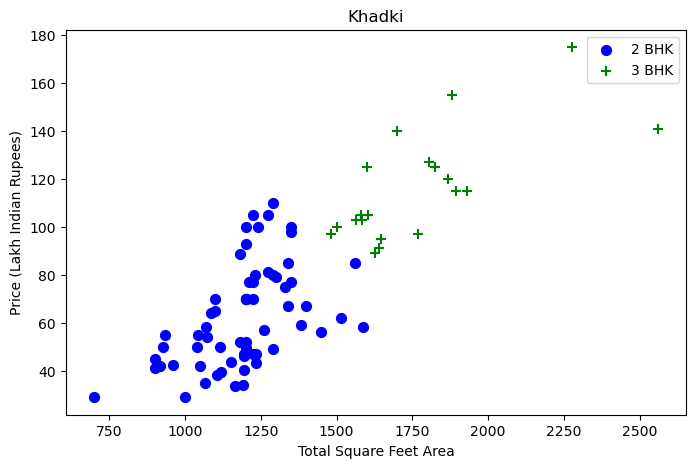

In [143]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (8,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Khadki")

# PRICE PER SQFT COUNT

Text(0, 0.5, 'Count')

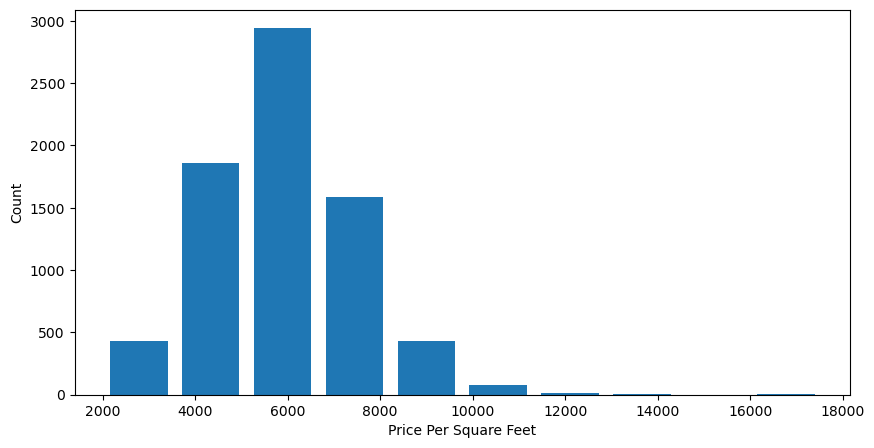

In [144]:
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(data.price_per_sq_ft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# NUMBER OF BATHROOM COUNT

Text(0, 0.5, 'Count')

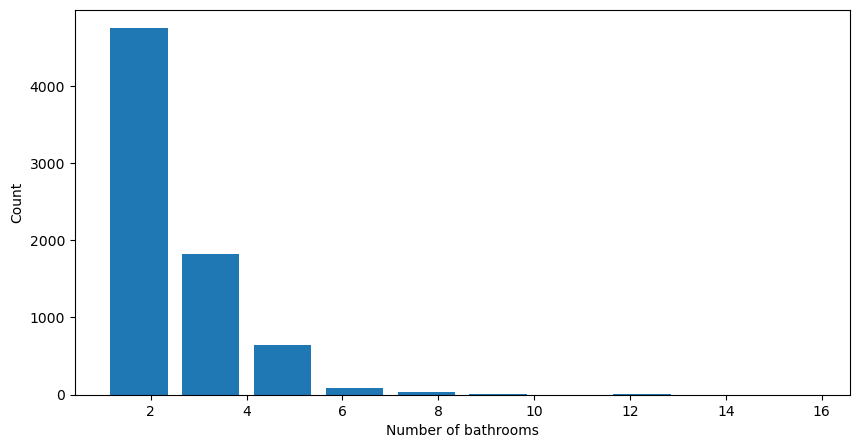

In [145]:
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 10765
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   size             7351 non-null   object 
 1   total_sqft       7351 non-null   float64
 2   bath             7351 non-null   float64
 3   price            7351 non-null   float64
 4   location         7351 non-null   object 
 5   bhk              7351 non-null   int32  
 6   price_per_sq_ft  7351 non-null   float64
dtypes: float64(4), int32(1), object(2)
memory usage: 430.7+ KB


In [147]:
data.drop(columns=['size','price_per_sq_ft'], inplace=True)

# CLEANED DATA

In [148]:
data.to_csv('../../Csv/Pune_Cleaned_Data.csv')